In [ ]:
# Fig 3 A  - R-programming

In [ ]:
# Fig 3 B   - Sayan

In [ ]:
# Fig 3 C   - Sayan

In [ ]:
# Fig 3 D    (2nd part ??)

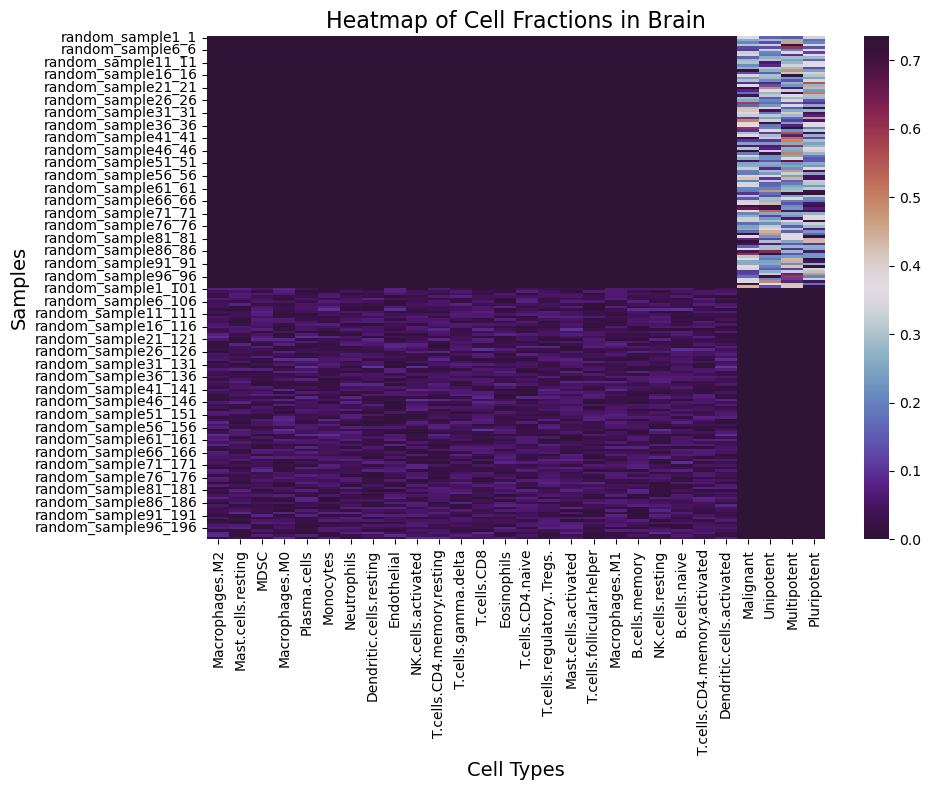

In [5]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/HP/Downloads/New deconvolution data/cell_fractions_Brain_combined.csv"
data = pd.read_csv(file_path, index_col=0)  # Assuming the first column is row names

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Create a heatmap with a purple color palette (using the "Purples" colormap)
sns.heatmap(data, cmap="twilight_shifted")

# Customize axis labels
plt.xlabel('Cell Types', fontsize=14)
plt.ylabel('Samples', fontsize=14)

# Add a title
plt.title('Heatmap of Cell Fractions in Brain', fontsize=16)

# Display the heatmap
plt.tight_layout()
plt.show()

In [ ]:
# Fig 3 E    - Sayan 

In [ ]:
# Fig 3 F 

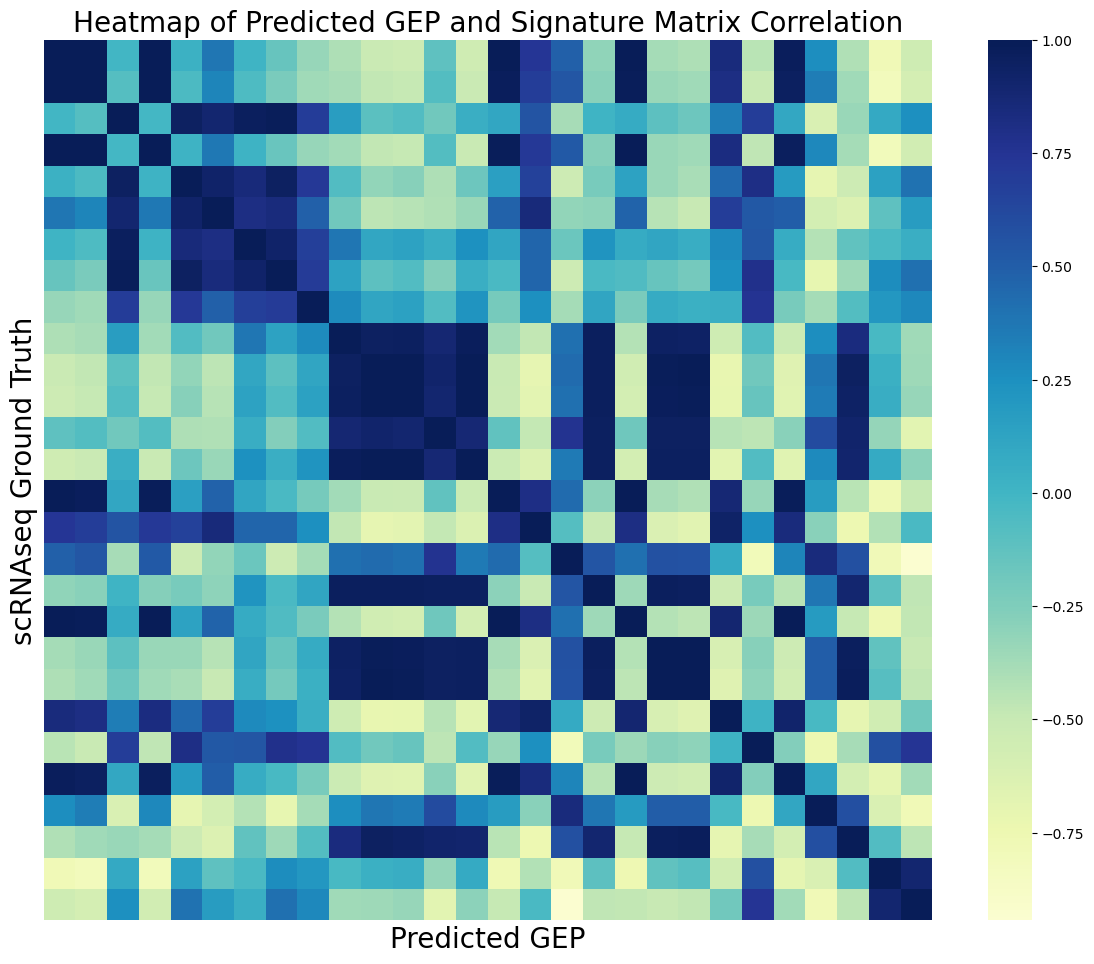

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


signature_matrix = pd.read_csv("C:\\Users\\HP\\Desktop\\shruti di comp\\new ascend data\\new malignant\\dynamic_signature_matrix_new_malignant.csv", index_col = 0)
predicted_gep = pd.read_csv("C:\\Users\\HP\\Desktop\\shruti di comp\\new ascend data\\new malignant\\30_gep_preds.csv", index_col = 0)

# Create DataFrames
df_predicted = pd.DataFrame(predicted_gep)
df_signature = pd.DataFrame(signature_matrix)

# Combine the two matrices horizontally
combined_matrix = pd.concat([df_predicted, df_signature], axis=1)

# Compute the correlation matrix
correlation_matrix = combined_matrix.corr()

n=correlation_matrix.shape[0]
n1 = n/2
n1 = int(n1)
# Extract the lower right 10x10 portion
lower_right_10x10 = correlation_matrix.iloc[-n1:, -n1:]


plt.figure(figsize=(12, 10))
sns.heatmap(lower_right_10x10, cmap='YlGnBu', center=0, annot=False)

# Set titles and labels
plt.title('Heatmap of Predicted GEP and Signature Matrix Correlation', fontsize=20)
plt.xlabel('Predicted GEP', fontsize=20)
plt.ylabel('scRNAseq Ground Truth', fontsize=20)

# Remove tick labels
plt.xticks([])  # Remove x tick labels
plt.yticks([])  # Remove y tick labels

plt.tight_layout(pad=2)
plt.show()

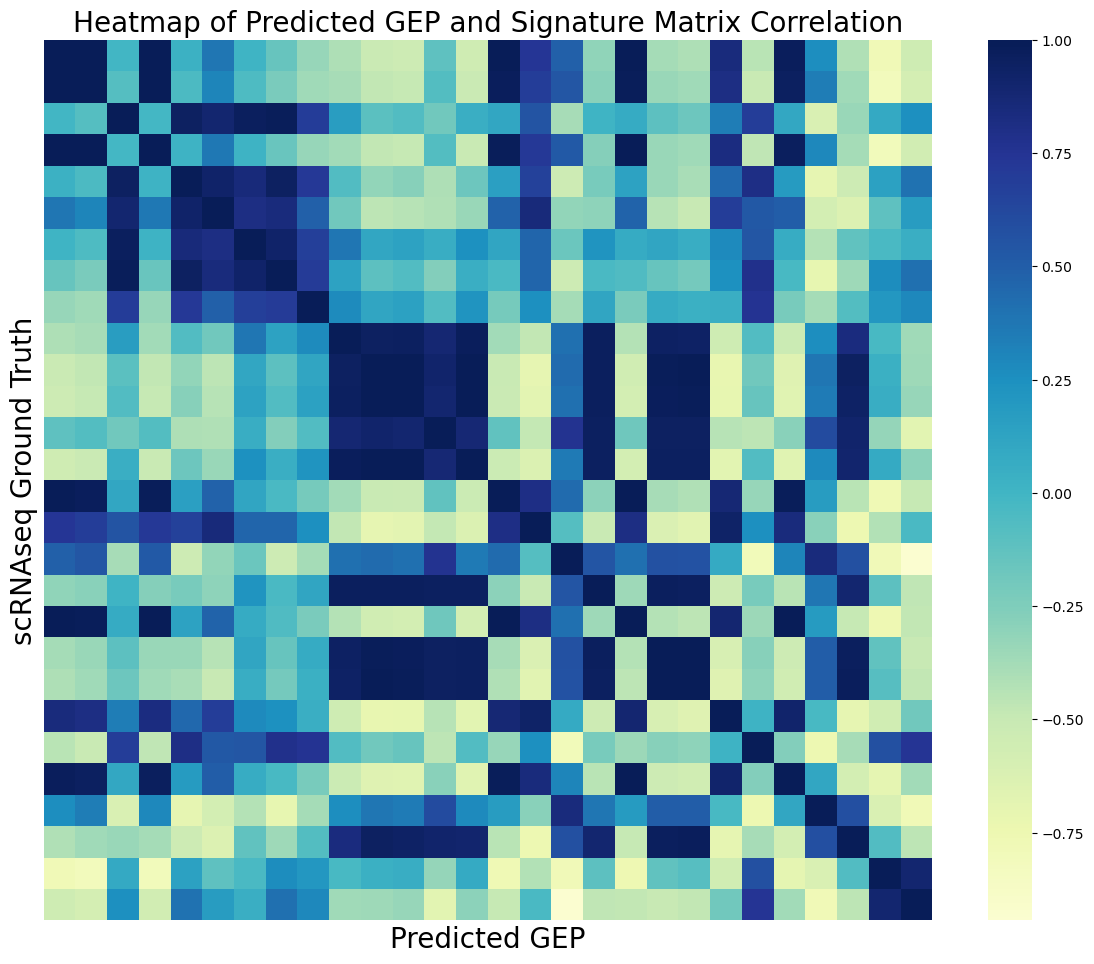

In [7]:
signature_matrix = pd.read_csv("C:\\Users\\HP\\Desktop\\shruti di comp\\new ascend data\\new malignant\\dynamic_signature_matrix_new_malignant.csv", index_col = 0)
predicted_gep = pd.read_csv("C:\\Users\\HP\\Desktop\\shruti di comp\\new ascend data\\new malignant\\300_gep_preds.csv", index_col = 0)

# Create DataFrames
df_predicted = pd.DataFrame(predicted_gep)
df_signature = pd.DataFrame(signature_matrix)

# Combine the two matrices horizontally
combined_matrix = pd.concat([df_predicted, df_signature], axis=1)

# Compute the correlation matrix
correlation_matrix = combined_matrix.corr()

n=correlation_matrix.shape[0]
n1 = n/2
n1 = int(n1)
# Extract the lower right 10x10 portion
lower_right_10x10 = correlation_matrix.iloc[-n1:, -n1:]


plt.figure(figsize=(12, 10))
sns.heatmap(lower_right_10x10, cmap='YlGnBu', center=0, annot=False)

# Set titles and labels
plt.title('Heatmap of Predicted GEP and Signature Matrix Correlation', fontsize=20)
plt.xlabel('Predicted GEP', fontsize=20)
plt.ylabel('scRNAseq Ground Truth', fontsize=20)

# Remove tick labels
plt.xticks([])  # Remove x tick labels
plt.yticks([])  # Remove y tick labels

plt.tight_layout(pad=2)
plt.show()

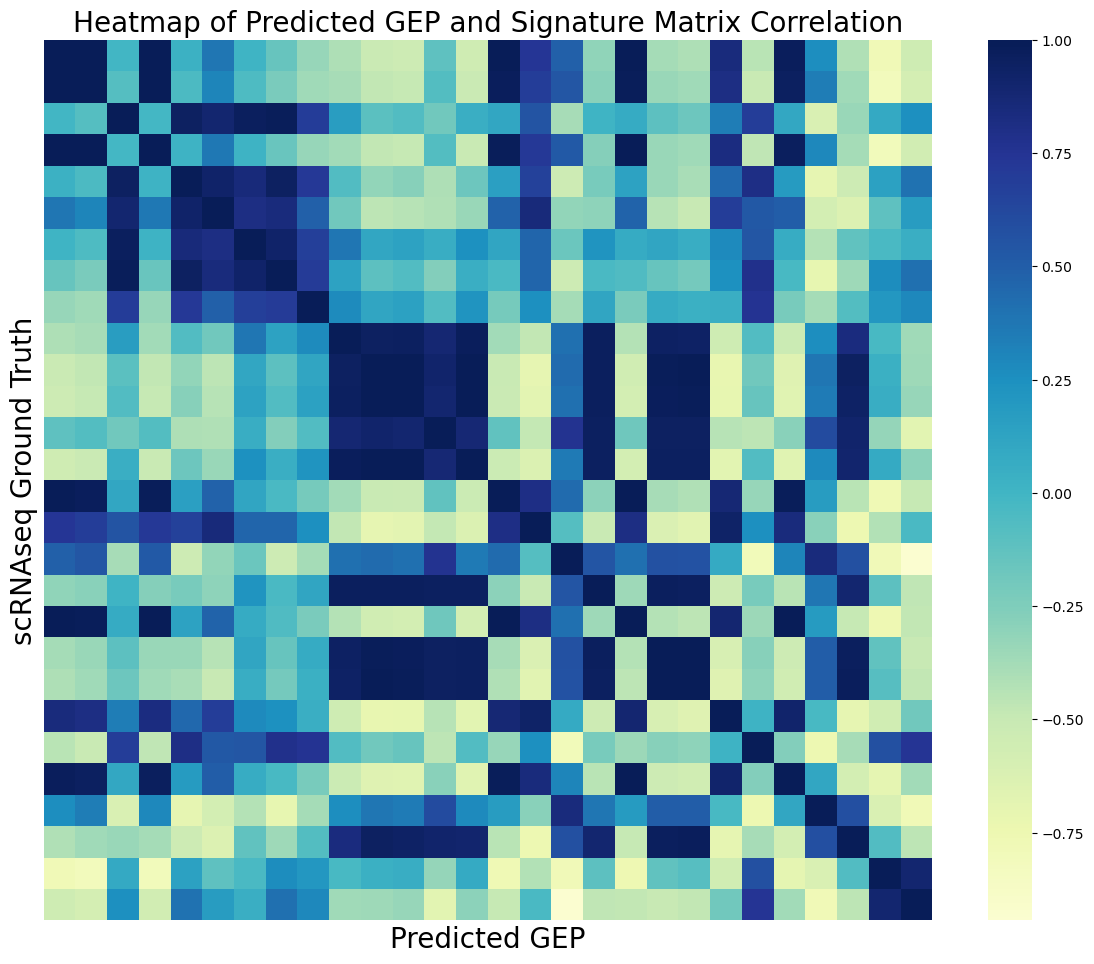

In [8]:
signature_matrix = pd.read_csv("C:\\Users\\HP\\Desktop\\shruti di comp\\new ascend data\\new malignant\\dynamic_signature_matrix_new_malignant.csv", index_col = 0)
predicted_gep = pd.read_csv("C:\\Users\\HP\\Desktop\\shruti di comp\\new ascend data\\new malignant\\900_gep_preds.csv", index_col = 0)

# Create DataFrames
df_predicted = pd.DataFrame(predicted_gep)
df_signature = pd.DataFrame(signature_matrix)

# Combine the two matrices horizontally
combined_matrix = pd.concat([df_predicted, df_signature], axis=1)

# Compute the correlation matrix
correlation_matrix = combined_matrix.corr()

n=correlation_matrix.shape[0]
n1 = n/2
n1 = int(n1)
# Extract the lower right 10x10 portion
lower_right_10x10 = correlation_matrix.iloc[-n1:, -n1:]


plt.figure(figsize=(12, 10))
sns.heatmap(lower_right_10x10, cmap='YlGnBu', center=0, annot=False)

# Set titles and labels
plt.title('Heatmap of Predicted GEP and Signature Matrix Correlation', fontsize=20)
plt.xlabel('Predicted GEP', fontsize=20)
plt.ylabel('scRNAseq Ground Truth', fontsize=20)

# Remove tick labels
plt.xticks([])  # Remove x tick labels
plt.yticks([])  # Remove y tick labels

plt.tight_layout(pad=2)
plt.show()

In [ ]:
# Fig 3 G

NameError: name 'r' is not defined

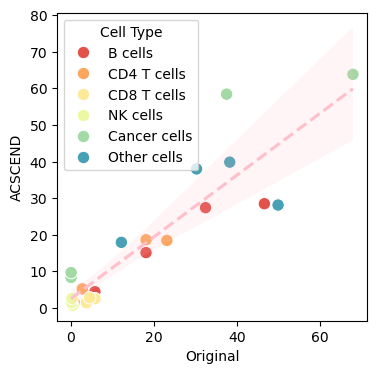

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# File paths
folder_path = r"C:\Users\HP\Downloads\oripred1"
original_path = f"{folder_path}\\ORIGINAL.csv"
acscend_path = f"{folder_path}\\ACSCEND.csv"

# Load datasets
original = pd.read_csv(original_path, index_col=0)
acscend = pd.read_csv(acscend_path, index_col=0)

# Melt the dataframes for easier plotting
original_melted = original.melt(ignore_index=False, var_name='Cell Type', value_name='Original').reset_index()
acscend_melted = acscend.melt(ignore_index=False, var_name='Cell Type', value_name='ACSCEND').reset_index()

# Merge the two melted dataframes on 'index' and 'Cell Type'
merged = pd.merge(original_melted, acscend_melted, on=['index', 'Cell Type'], suffixes=('_original', '_acscend'))
merged.rename(columns={'index': 'Sample'}, inplace=True)

# Calculate Pearson's r and p-value across all points
Pearsons_r, p_value = pearsonr(merged['Original'], merged['ACSCEND'])

# Scatter plot with regression line
plt.figure(figsize=(4, 4))
sns.scatterplot(data=merged, x='Original', y='ACSCEND', hue='Cell Type', palette='Spectral', s=80)
sns.regplot(data=merged, x='Original', y='ACSCEND', scatter=False, color='pink', line_kws={'linestyle': 'dashed'})

# Add Pearson's r and p-value to the plot
plt.text(0.05, 0.9, f"$Pearsons-r = {r:.2f}$\n$p-value = {p:.3e}$", transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"), fontsize=16)

plt.xlabel("FACS ground truth", fontsize=16)
plt.ylabel("ACSCEND predictions", fontsize=16)
plt.xticks (fontsize=16)
plt.yticks (fontsize=16)
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot at 1200 DPI
output_path = 'C:/Users/HP/Downloads/EPIC_comparison_plots.png'
plt.savefig(output_path, dpi=1200, bbox_inches='tight')

plt.tight_layout()
plt.show()


In [ ]:
# Fig 3 H

NameError: name 'bar' is not defined

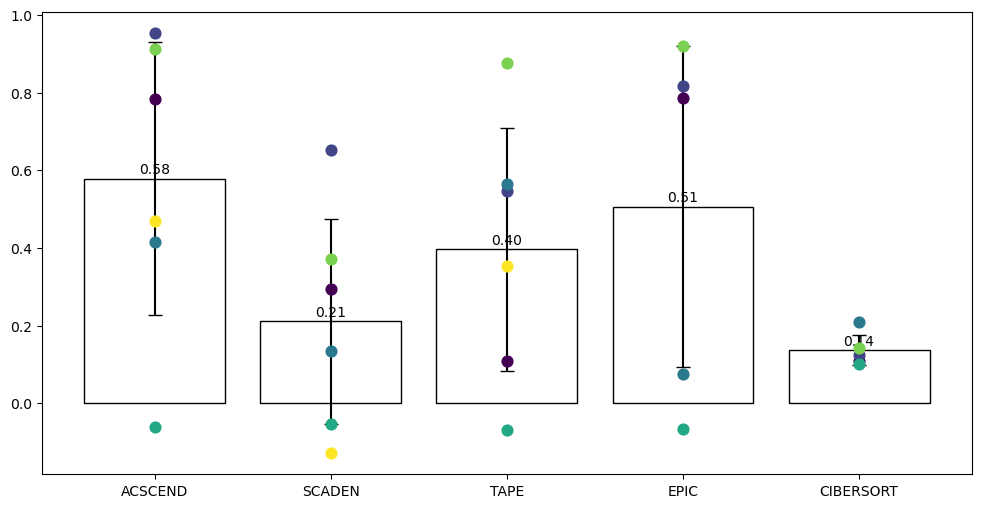

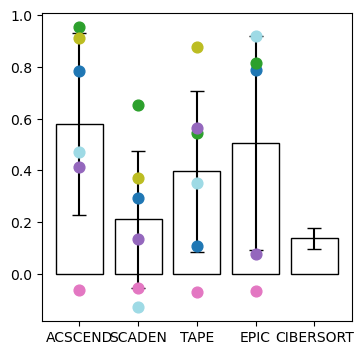

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate Concordance Correlation Coefficient (CCC)
def calculate_ccc(x, y):
    mean_x, mean_y = np.mean(x), np.mean(y)
    covariance = np.cov(x, y, ddof=1)[0, 1]
    var_x, var_y = np.var(x, ddof=1), np.var(y, ddof=1)
    ccc = (2 * covariance) / (var_x + var_y + (mean_x - mean_y) ** 2)
    return ccc

# File paths
folder_path = r"C:\Users\HP\Downloads\oripred1"
files = ['ORIGINAL.csv', 'ACSCEND.csv', 'SCADEN.csv', 'TAPE.csv', 'EPIC.csv', 'CIBERSORT.csv', 'ORIGINAL2.csv']

# Load the data
data = {file.split('.')[0]: pd.read_csv(f"{folder_path}\\{file}", index_col=0) for file in files}

# Convert to fractions by dividing each value by 100
for key, df in data.items():
    data[key] = df / 100

# Calculate CCC for each model compared to ORIGINAL and ORIGINAL2
original = data['ORIGINAL']
original2 = data['ORIGINAL2']

# Metrics: For each model, calculate CCC and its SD
ccc_values = {'ACSCEND': [], 'SCADEN': [], 'TAPE': []}
errors = {'ACSCEND': [], 'SCADEN': [], 'TAPE': []}

# Compute CCC and SD for each model compared to ORIGINAL
for model in ['ACSCEND', 'SCADEN', 'TAPE']:
    ccc_for_model = []
    for cell_type in original.columns:
        ccc_for_model.append(calculate_ccc(original[cell_type], data[model][cell_type]))
    ccc_values[model] = np.mean(ccc_for_model)
    errors[model] = np.std(ccc_for_model)

# Metrics: For each model, calculate CCC and its SD for EPIC and CIBERSORT compared to ORIGINAL2
ccc_values2 = {'EPIC': [], 'CIBERSORT': []}
errors2 = {'EPIC': [], 'CIBERSORT': []}

# Compute CCC and SD for each model compared to ORIGINAL2
for model in ['EPIC', 'CIBERSORT']:
    ccc_for_model = []
    for cell_type in original2.columns:
        ccc_for_model.append(calculate_ccc(original2[cell_type], data[model][cell_type]))
    ccc_values2[model] = np.mean(ccc_for_model)
    errors2[model] = np.std(ccc_for_model)


# Create bar plot with points
def plot_bar_with_points(ccc_values, errors, ccc_values2, errors2, title, ylabel):
    # Combine data for plotting
    models_1 = list(ccc_values.keys())
    values_1 = list(ccc_values.values())
    err_1 = list(errors.values())
    
    models_2 = list(ccc_values2.keys())
    values_2 = list(ccc_values2.values())
    err_2 = list(errors2.values())

    # Create color map based on cell types for scatter points
    colors = plt.cm.viridis(np.linspace(0, 1, len(original.columns)))

    fig, ax = plt.subplots(figsize=(12, 6))

    # Create the bars for ACSCEND, SCADEN, TAPE (compared to ORIGINAL)
    bars_1 = ax.bar(models_1, values_1, color='none', edgecolor='black', yerr=err_1, capsize=5, label="Compared to ORIGINAL")

    # Create the bars for EPIC, CIBERSORT (compared to ORIGINAL2)
    bars_2 = ax.bar(models_2, values_2, color='none', edgecolor='black', yerr=err_2, capsize=5, label="Compared to ORIGINAL2")

    # Add scatter points for each model
    for i, model in enumerate(models_1):
        for j, cell_type in enumerate(original.columns):
            ccc_value = calculate_ccc(original[cell_type], data[model][cell_type])
            ax.scatter(model, ccc_value, color=colors[j], label=cell_type if i == 0 else "", s=60, zorder=5)

    for i, model in enumerate(models_2):
        for j, cell_type in enumerate(original2.columns):
            ccc_value = calculate_ccc(original2[cell_type], data[model][cell_type])
            ax.scatter(model, ccc_value, color=colors[j], label=cell_type if i == 0 else "", s=60, zorder=5)

    # Annotate the bar values
    for bar in bars_1 + bars_2:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f'{bar.get_height():.2f}',
                ha='center', va='bottom', fontsize=10)

# Plot CCC comparison for both groups (ACSCEND, TAPE, SCADEN vs ORIGINAL) and (EPIC, CIBERSORT vs ORIGINAL2)
plot_bar_with_points(ccc_values, errors, ccc_values2, errors2, "CCC Comparison", "CCC")





import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate Concordance Correlation Coefficient (CCC)
def calculate_ccc(x, y):
    mean_x, mean_y = np.mean(x), np.mean(y)
    covariance = np.cov(x, y, ddof=1)[0, 1]
    var_x, var_y = np.var(x, ddof=1), np.var(y, ddof=1)
    ccc = (2 * covariance) / (var_x + var_y + (mean_x - mean_y) ** 2)
    return ccc

# File paths
folder_path = r"C:\Users\HP\Downloads\oripred1"
files = ['ORIGINAL.csv', 'ACSCEND.csv', 'SCADEN.csv', 'TAPE.csv', 'EPIC.csv', 'CIBERSORT.csv', 'ORIGINAL2.csv']

# Load the data
data = {file.split('.')[0]: pd.read_csv(f"{folder_path}\\{file}", index_col=0) for file in files}

# Convert to fractions by dividing each value by 100
for key, df in data.items():
    data[key] = df / 100

# Calculate CCC for each model compared to ORIGINAL and ORIGINAL2
original = data['ORIGINAL']
original2 = data['ORIGINAL2']

# Metrics: For each model, calculate CCC and its SD
ccc_values = {'ACSCEND': [], 'SCADEN': [], 'TAPE': []}
errors = {'ACSCEND': [], 'SCADEN': [], 'TAPE': []}

# Compute CCC and SD for each model compared to ORIGINAL
for model in ['ACSCEND', 'SCADEN', 'TAPE']:
    ccc_for_model = []
    for cell_type in original.columns:
        ccc_for_model.append(calculate_ccc(original[cell_type], data[model][cell_type]))
    ccc_values[model] = np.mean(ccc_for_model)
    errors[model] = np.std(ccc_for_model)

# Metrics: For each model, calculate CCC and its SD for EPIC and CIBERSORT compared to ORIGINAL2
ccc_values2 = {'EPIC': [], 'CIBERSORT': []}
errors2 = {'EPIC': [], 'CIBERSORT': []}

# Compute CCC and SD for each model compared to ORIGINAL2
for model in ['EPIC', 'CIBERSORT']:
    ccc_for_model = []
    for cell_type in original2.columns:
        ccc_for_model.append(calculate_ccc(original2[cell_type], data[model][cell_type]))
    ccc_values2[model] = np.mean(ccc_for_model)
    errors2[model] = np.std(ccc_for_model)

# Create a consistent color map based on cell types across all datasets
# Here, we're assuming that the columns in the 'ORIGINAL' dataset represent the cell types.
colors = plt.cm.tab20(np.linspace(0, 1, len(original.columns)))
cell_type_colors = {cell_type: colors[i] for i, cell_type in enumerate(original.columns)}

# Create bar plot with points
def plot_bar_with_points(ccc_values, errors, ccc_values2, errors2, title, ylabel):
    # Combine data for plotting
    models_1 = list(ccc_values.keys())
    values_1 = list(ccc_values.values())
    err_1 = list(errors.values())
    
    models_2 = list(ccc_values2.keys())
    values_2 = list(ccc_values2.values())
    err_2 = list(errors2.values())

    fig, ax = plt.subplots(figsize=(4, 4))

    # Create the bars for ACSCEND, SCADEN, TAPE (compared to ORIGINAL)
    bars_1 = ax.bar(models_1, values_1, color='none', edgecolor='black', yerr=err_1, capsize=5, label="Compared to ORIGINAL")

    # Create the bars for EPIC, CIBERSORT (compared to ORIGINAL2)
    bars_2 = ax.bar(models_2, values_2, color='none', edgecolor='black', yerr=err_2, capsize=5, label="Compared to ORIGINAL2")

    # Add scatter points for each model
    for i, model in enumerate(models_1):
        for j, cell_type in enumerate(original.columns):
            ccc_value = calculate_ccc(original[cell_type], data[model][cell_type])
            ax.scatter(model, ccc_value, color=cell_type_colors[cell_type], label=cell_type if i == 0 else "", s=60, zorder=5)

    for i, model in enumerate(models_2):
        for j, cell_type in enumerate(original2.columns):
            ccc_value = calculate_ccc(original2[cell_type], data[model][cell_type])
            ax.scatter(model, ccc_value, color=cell_type_colors[cell_type], label=cell_type if i == 0 else "", s=60, zorder=5)

    # Annotate the bar values
    #for bar in bars_1 + bars_2:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f'{bar.get_height():.2f}',
                ha='center', va='bottom', fontsize=10)

    # Customize plot
    #ax.set_title(title, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_xlabel("Models", fontsize=14)
    # Format the x-axis labels
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    ax.legend(title='Cell Types', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(False)
    # Save the plot at 1200 DPI
    output_path = 'C:/Users/HP/Downloads/CCC_epic_plots.png'
    plt.savefig(output_path, dpi=1200, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

# Plot CCC comparison for both groups (ACSCEND, TAPE, SCADEN vs ORIGINAL) and (EPIC, CIBERSORT vs ORIGINAL2)
plot_bar_with_points(ccc_values, errors, ccc_values2, errors2, "CCC Comparison", "CCC")


C:\Users\HP\AppData\Local\Temp\ipykernel_96580\3168774173.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20', len(all_columns))  # Use a discrete colormap for unique columns


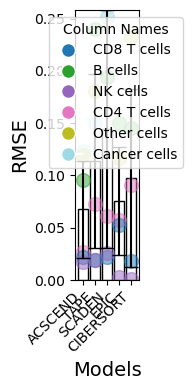

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 1: Load the datasets (assumed files are in the Downloads folder)
folder_path = r"C:\Users\HP\Downloads\oripred1"

# Filenames for all datasets
files = ["ORIGINAL.csv", "ACSCEND.csv", "SCADEN.csv", "TAPE.csv", "EPIC.csv", "CIBERSORT.csv", "ORIGINAL2.csv"]

# Load all datasets into a dictionary
datasets = {file.split('.')[0]: pd.read_csv(os.path.join(folder_path, file), index_col=0) for file in files}

# Step 2: Convert values to fractions by dividing by 100
for key in datasets:
    datasets[key] = datasets[key] / 100

# Step 3: Calculate RMSE for each column
def calculate_rmse(df1, df2):
    return np.sqrt(((df1 - df2) ** 2).mean())

# Store RMSE results
rmse_results = {}

# RMSE for comparisons
comparisons = [
    ('ACSCEND', 'ORIGINAL'),
    ('TAPE', 'ORIGINAL'),
    ('SCADEN', 'ORIGINAL'),
    ('EPIC', 'ORIGINAL2'),
    ('CIBERSORT', 'ORIGINAL2')
]

for model, original in comparisons:
    rmse_values = []
    for col in datasets[original].columns:
        rmse_values.append(calculate_rmse(datasets[model][col], datasets[original][col]))
    rmse_results[model] = rmse_values

# Step 4: Create a color map based on unique column names across datasets
all_columns = list(set(datasets['ACSCEND'].columns).union(datasets['TAPE'].columns, datasets['SCADEN'].columns, 
                                                           datasets['EPIC'].columns, datasets['CIBERSORT'].columns))
colormap = plt.cm.get_cmap('tab20', len(all_columns))  # Use a discrete colormap for unique columns

# Create a color map dictionary to map each column name to a color
color_map_dict = {col: colormap(i / len(all_columns)) for i, col in enumerate(all_columns)}

# Step 5: Plotting RMSE values with error bars and no gradient background
models = list(rmse_results.keys())
mean_rmse = [np.mean(rmse_results[model]) for model in models]
std_rmse = [np.std(rmse_results[model]) for model in models]

# Create the plot
plt.figure(figsize=(4, 4))

# Create bar plot (with no fill color)
bars = plt.bar(models, mean_rmse, color='none', edgecolor='black', yerr=std_rmse, capsize=5, align='center')

# Add points for each RMSE value with different colors based on column names
for i, model in enumerate(rmse_results):
    for j, value in enumerate(rmse_results[model]):
        column_name = datasets[model].columns[j]  # Get the column name
        plt.scatter([model], [value], color=color_map_dict[column_name], alpha=0.5, s=100)

# Add labels and title
#plt.title('RMSE Comparison Between Models and Datasets', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('RMSE', fontsize=14)

# Set the limits for the plot
plt.ylim(0, max(mean_rmse) + max(std_rmse))

# Format the x-axis labels
plt.xticks(rotation=45, ha='right')

# Create the legend using the color map dictionary
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
           for color in color_map_dict.values()]
labels = list(color_map_dict.keys())
plt.legend(handles, labels, title="Column Names", loc='upper right', bbox_to_anchor=(1.8, 1))

# Save the plot at 1200 DPI
output_path = 'C:/Users/HP/Downloads/rmse_epic_plots.png'
plt.savefig(output_path, dpi=1200, bbox_inches='tight')

# Adjust the plot to make it tight
plt.tight_layout()
plt.show()
